## Problem Statement:

Insightin Health partners with Medicare insurance companies to create better member journeys. An issue one of our clients suffers is the significant loss of members in recent years. Before finding out the best action, our first task is to identify members who are likely to terminate their insurance plan.


The objectives are to:<br>  
1) explore within each parameter, and examine for statistical correlations among different parameters and review the distribution patterns; <br> 
2) develop a risk score that can be applied to all the existing members showing how likely each member is going to disenroll from a plan; <br> 
3) evaluate method & further discussions.

<a id='top'></a>

## Table of Contents: 
### 1. <a href='#import'>Import Data</a>
### 2. <a href='#EDA'>Exploratory Data Analysis</a>
21. <a href='#2.1'>How many churns are voluntary?</a><br>
22. <a href='#2.2'>Distribution of disenrollment in each LOB group</a><br>
23. <a href='#2.3'>Data cleaning</a><br>
24. <a href='#2.4'>Outliers</a><br>
25. <a href='#2.5'>Data distribution within each feature</a><br>
26. <a href='#2.6'>Colinearity within the features</a><br>

### 3. <a href='#3.0'>Machine Learning</a>
31. <a href='#3.1'>Random Forest</a>
32. <a href='#3.2'>Gradient Boosting</a>

### 4. <a href='#4.0'>Further discussion</a>



<a id='import'></a>
## 1. Import data

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [60]:
df = pd.read_csv('DataScience-HomeworkData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76995 entries, 0 to 76994
Data columns (total 17 columns):
MEMBER_ID             76995 non-null object
LOB                   76995 non-null object
Voluntary             25206 non-null object
churned               76995 non-null int64
Tenure                76995 non-null int64
hadGap.               76995 non-null int64
Age                   76995 non-null int64
SDOHScore             76995 non-null float64
conditionScore        76995 non-null float64
substanceScore        76995 non-null float64
physFrailtyScore      76995 non-null float64
mentalFrailtyScore    76995 non-null float64
EDCost                66365 non-null float64
EDCount               66365 non-null float64
IPCost                66365 non-null float64
IPCount               66365 non-null float64
State                 76995 non-null object
dtypes: float64(9), int64(4), object(4)
memory usage: 10.0+ MB


In [61]:
df.head()

,MEMBER_ID,LOB,Voluntary,churned,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,EDCost,EDCount,IPCost,IPCount,State
0,7ea90bb64201ddaf463eb9419ad990d9,LOB2,NaN,0,49,0,59,0.018738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PA
1,6319ce06253302493c1fe5d57d57aba7,LOB1,NaN,0,49,0,80,0.012270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PA
2,e7c98ad14a283b1bb751dd73b76f1ef9,LOB1,NaN,0,49,0,45,0.000435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PA
3,6189fb5bf21454cb7c01f15cb1bb78ec,LOB4,NaN,0,49,0,25,0.033174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NC
4,8793004f217e16c695b043fa78b9c74b,LOB5,NaN,0,49,0,66,0.405166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OH


<a id='EDA'></a>
## 2. Exploratory data analysis

In [62]:
df.describe()

,churned,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,EDCost,EDCount,IPCost,IPCount
count,76995.000000,76995.000000,76995.000000,76995.000000,76995.000000,76995.00000,76995.000000,76995.000000,76995.000000,66365.000000,66365.000000,6.636500e+04,66365.000000
mean,0.327372,1429.131268,0.115852,60.320008,0.264275,0.18384,0.077503,0.077058,0.224086,1050.521080,1.688194,4.700686e+03,0.524388
std,0.469257,1378.630014,0.320049,14.588613,0.516757,0.21631,0.154429,0.104734,0.249983,2881.194445,4.093950,1.759468e+04,1.575237
min,0.000000,0.000000,0.000000,15.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,335.000000,0.000000,52.000000,0.003828,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,0.000000,931.000000,0.000000,62.000000,0.033894,0.15000,0.000000,0.000000,0.000000,122.210000,1.000000,0.000000e+00,0.000000
75%,1.000000,2026.000000,0.000000,70.000000,0.293096,0.30000,0.000000,0.111111,0.500000,1068.440000,2.000000,0.000000e+00,0.000000
max,1.000000,4552.000000,1.000000,107.000000,8.115451,1.00000,1.000000,0.777778,1.000000,267123.170000,287.000000,1.381901e+06,80.000000


In [6]:
df.LOB.unique() # check if there is any null values 

array(['LOB2', 'LOB1', 'LOB4', 'LOB5', 'LOB3', 'LOB8', 'LOB7', 'LOB6'],
      dtype=object)

In [7]:
df.Voluntary.unique() # check if there is any null values 

array([nan, 'Voluntary', 'Involuntary - Medicare / Other',
       'Involuntary - SNP'], dtype=object)

In [8]:
churnperc=df.churned[df.churned==1].count()/df.churned.count()*100  ## calculate the percentage of churned customers over all
print('The percentage of disenrolled customers is',"{0:.2f}".format(churnperc) ,'%.')

The percentage of disenrolled customers is 32.74 %.


There are null values in the Voluntary column. The voluntary feature explains the percentage of voluntary disenrollment vs non-voluntary disenrollment. However, we can not use this column for churn prediction as this column is a descriptive column for churn and is colinear with the target feature. Before we remove the voluntary column, let's check how many churns are voluntary.

<a id='2.1'></a>
### 2.1  How many churns are voluntary?

In [9]:
churned=df[df.churned==1] ## select the churned customers

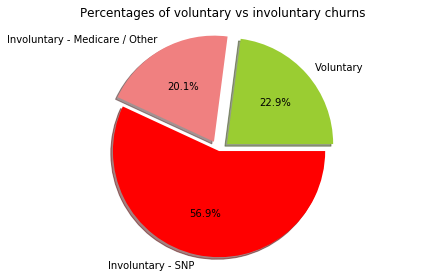

In [10]:
labels = ['Voluntary', 'Involuntary - Medicare / Other','Involuntary - SNP']
churncount = churned.groupby('Voluntary').count()
colors = ['yellowgreen', 'lightcoral','red']

explode = (0.1, 0.1, 0)  
plt.pie(churncount['churned'], labels=labels,explode=explode,shadow=True, colors=colors,autopct='%.1f%%')
plt.axis('equal')
plt.title("Percentages of voluntary vs involuntary churns")
plt.tight_layout()
plt.show()

In [11]:
df=df.drop(['MEMBER_ID','Voluntary'],axis=1) # Neither member ID and voluntary column can be used in the prediction process.

<a id='2.2'></a>
### 2.2  Distribution of disenrollment in each LOB group

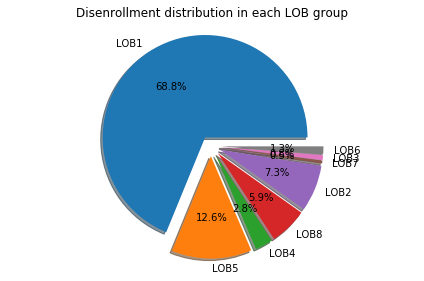

In [12]:
labels = churned.LOB.unique() 
lobcount = churned.groupby('LOB').count()
explode = (0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1)  
plt.pie(lobcount['churned'], labels=labels,shadow=True, explode=explode, autopct='%.1f%%')
plt.axis('equal')
plt.title("Disenrollment distribution in each LOB group")
plt.tight_layout()
plt.show()

68.8% of the disenrollments occur in LOB1 group, followed by LOB5 (12.6% of total disenrollments). This suggests that the LOB group could be a potential churn predictor.

In [13]:
percchurned={}
for lob in labels:
    percchurned[lob]=churned.LOB[df.LOB==lob].count()/df.LOB[df.LOB==lob].count()*100
percchurned
pd.DataFrame(list(percchurned.items()), index=None, columns=['LOB','Percent Churn (%)']).sort_values('Percent Churn (%)')

,LOB,Percent Churn (%)
0,LOB1,29.430831
4,LOB2,34.031190
5,LOB7,43.875278
7,LOB6,45.098039
3,LOB8,50.078003
6,LOB3,51.349380
2,LOB4,52.644570
1,LOB5,58.579131


Different LOB groups have varying percentages of churns, with LOB1 having the lowest churn percentage and LOB5 having the highest. 

<a id='2.3'></a>
### 2.3 Data cleaning

In [14]:
## Assert that there is no missing value in the target feature:
df.churned.unique()

array([0, 1], dtype=int64)

In [15]:
## Assert that there is no missing value in the hadgap feature:
df['hadGap.'].unique()

array([0, 1], dtype=int64)

In [16]:
## Assert that there is no missing value:
df.isnull().values.any()

True

In [17]:
null_counts = df.isnull().sum()  ## count the null inputs and list the features that contain null values
null_counts[null_counts > 0].sort_values(ascending=False)

IPCount    10630
IPCost     10630
EDCount    10630
EDCost     10630
dtype: int64

In [18]:
nulldf=df[df.IPCount.isnull()==True] ## extract the rows where there is null 
nulldf.head(10)

,LOB,churned,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,EDCost,EDCount,IPCost,IPCount,State
6,LOB1,1,30,0,27,0.000003,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,PA
14,LOB5,1,30,0,41,0.011908,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,OH
21,LOB4,1,30,0,41,0.165626,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NC
62,LOB1,1,30,0,45,0.134890,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,PA
87,LOB4,1,30,0,75,1.078957,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NC
110,LOB8,1,30,0,75,0.249133,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,OH
115,LOB2,1,30,0,68,0.019418,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,PA
132,LOB2,1,29,0,69,0.924359,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,PA
137,LOB8,1,60,0,57,0.376499,0.0,0.333333,0.0,0.5,NaN,NaN,NaN,NaN,OH
139,LOB5,1,29,0,61,3.887713,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,OH


In [19]:
nulldf.churned.unique() ## confirm that all the null values exist for churned customers

array([1], dtype=int64)

In [20]:
countchurned=df.churned[df.churned==1].count()  
print('Of all the churned customers, 10630 out of',"{0:}".format(countchurned) ,' have no EDCost, EDcount, IPcost and IP count info. ')

Of all the churned customers, 10630 out of 25206  have no EDCost, EDcount, IPcost and IP count info. 


Without domain knowledge, it is difficult to impuate the data for all these four columns. Afterall, the missing data counts for 40% of the data in these four columns for churned customers. The manual imputation of such large amount of data may introduce a significant level of inaccuracy and bias. With that in mind, here are several options: <br>

1) remove the rows with missing values in these four columns<br>
2) replace the missing values using mean <br>
3) replace the missing values using median<br>
4) replace the missing values using the most frequent value <br>
5) do not use these four columns for churn prediction<br>

If we were to impute the values and incorperate them into the model, the model may not generalize well for future data: the real data may have a different pattern than our imputation. Before we decide, let us take a look at the statistics of the data in these four columns.

In [21]:
notnullchurn=churned[churned.IPCount.isnull()==False] ## select churned data with nulls removed

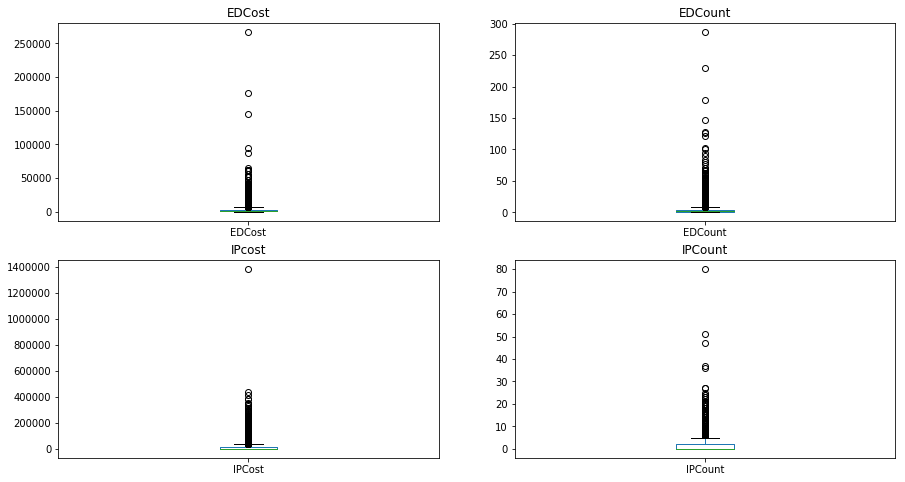

In [22]:
## Box plot to assess the distribution of the data
f, axs = plt.subplots(2,2,figsize=(15,8))
plt.subplot(2, 2, 1)
notnullchurn['EDCost'].plot(kind='box', title='EDCost')
plt.subplot(2, 2, 2)
notnullchurn['EDCount'].plot(kind='box', title='EDCount')
plt.subplot(2, 2, 3)
notnullchurn['IPCost'].plot(kind='box', title='IPcost')
plt.subplot(2, 2, 4)
notnullchurn['IPCount'].plot(kind='box', title='IPCount')

plt.show()

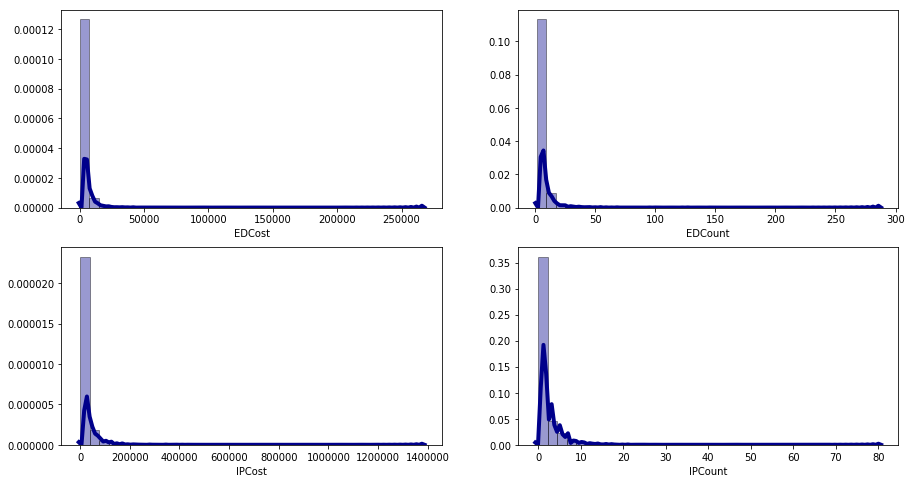

In [23]:
## Seaborn density plots to assess the most frequent values in each column
f, axs = plt.subplots(2,2,figsize=(15,8))
plt.subplot(2, 2, 1)
sns.distplot(notnullchurn['EDCost'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.subplot(2, 2, 2)
sns.distplot(notnullchurn['EDCount'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot(2, 2, 3)
sns.distplot(notnullchurn['IPCost'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot(2, 2, 4)
sns.distplot(notnullchurn['IPCount'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()

Based on the desntiy plots, we can conclude that for the churned customers, the most frequent ED cost is within 8k, the most frequent ED count is less than 10, the most frequent IP cost is less than 50k and the most frequent IP count is less than 4.

In [24]:
notnullstat=notnullchurn[['EDCost','EDCount','IPCost','IPCount']].describe()
notnullstat

,EDCost,EDCount,IPCost,IPCount
count,14576.000000,14576.000000,1.457600e+04,14576.000000
mean,2459.567857,4.064833,1.373702e+04,1.494992
std,4884.345007,6.860320,3.058271e+04,2.681666
min,0.000000,1.000000,0.000000e+00,0.000000
25%,489.685000,1.000000,0.000000e+00,0.000000
50%,1241.615000,2.000000,0.000000e+00,0.000000
75%,2848.370000,4.000000,1.517425e+04,2.000000
max,267123.170000,287.000000,1.381901e+06,80.000000


The above table shows the statistics of the four variables in churned customers. The standard deviation for these 4 variables are very big compared the the means.

In [25]:
unchurnedstat=df[df.churned==0][['EDCost','EDCount','IPCost','IPCount']].describe()
unchurnedstat

,EDCost,EDCount,IPCost,IPCount
count,51789.000000,51789.00000,51789.000000,51789.000000
mean,653.945247,1.01929,2157.412596,0.251212
std,1790.942097,2.48898,10199.295645,0.903378
min,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000
75%,579.460000,1.00000,0.000000,0.000000
max,69589.360000,107.00000,844264.290000,21.000000


The above table shows the statistics of the four variables in unchurned customers. Note that the means of the four varibales are much lower for unchurned customers than churned customers. Although these four columns may be good indicators for churn prediction, however, introducing interference on 40% of the data is not an optimal choice. For now, we will discard these four columns for the machine learning process. One can always come back and impute the missing values and compare the model performance later.

In [26]:
newdf=df.drop(['EDCost','EDCount','IPCost','IPCount'],axis=1) ## remove the four columns that contain nulls

In [27]:
## Assert that there is no missing value:
newdf.isnull().values.any()

False

<a id='2.4'></a>
### 2.4 Outliers

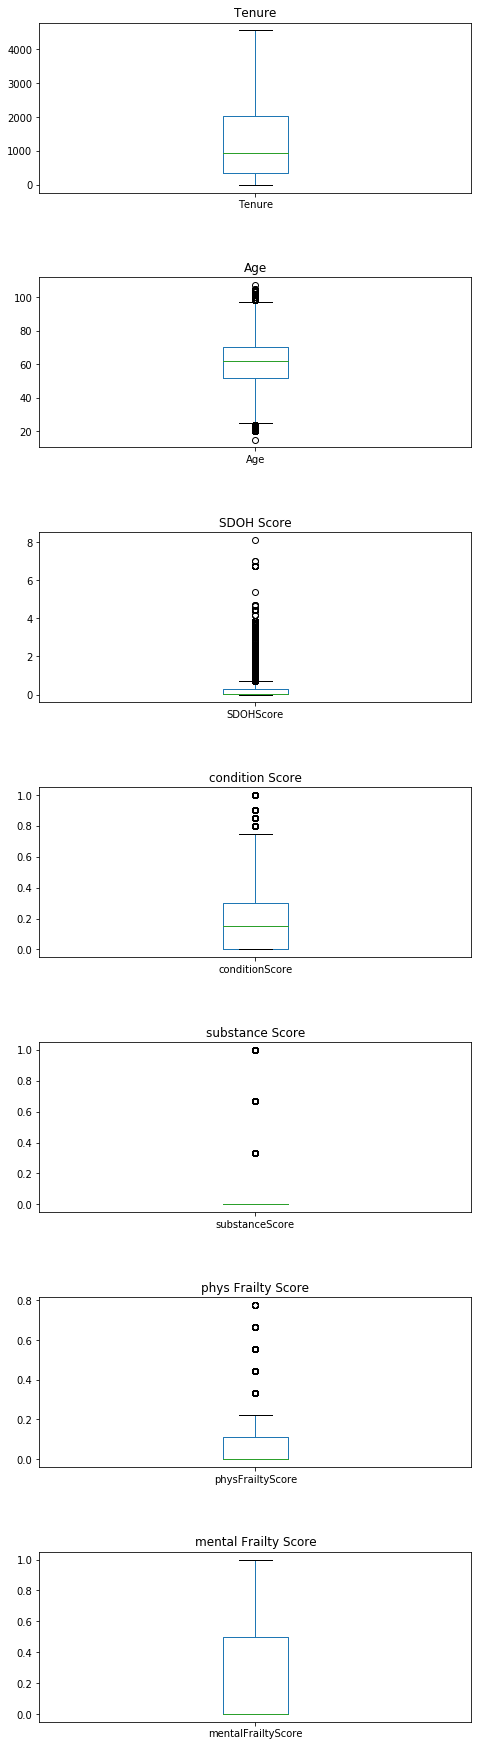

In [28]:
## Box plots to identify outliers
f, axs = plt.subplots(7,1,figsize=(15,8))
plt.subplot(7, 1, 1)
newdf['Tenure'].plot(kind='box', title='Tenure')


plt.subplot(7, 1, 2)
newdf['Age'].plot(kind='box', title='Age')

plt.subplot(7, 1, 3)
newdf['SDOHScore'].plot(kind='box', title='SDOH Score')

plt.subplot(7, 1, 4)
newdf['conditionScore'].plot(kind='box', title='condition Score')

plt.subplot(7, 1, 5)
newdf['substanceScore'].plot(kind='box', title='substance Score')


plt.subplot(7, 1, 6)
newdf['physFrailtyScore'].plot(kind='box', title='phys Frailty Score')

plt.subplot(7, 1, 7)
newdf['mentalFrailtyScore'].plot(kind='box', title='mental Frailty Score')


plt.subplots_adjust(left=0.6, bottom=0.05, right=1, top=3, wspace=0.5, hspace=0.5)
plt.show()

It does not look like there is any input error in the data set. All the data values, including the outliers are reasonable. Please correct if wrong. Domain knowledge is needed for the judge call. 

In [29]:
## Define a function to remove outliers: the theory is to find data with difference from sample median bigger than three times of
## the standard deviation.
def reject_outliers(data,n, m = 3):
    d = np.abs(data[n] - np.median(data[n]))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

Median values instead of mean is used to identify outliers due to the non normal distributon of the data.

In [30]:
trimmeddf=reject_outliers(newdf,'conditionScore', m=3)

trimmeddf.shape # trimmed data set shape

(71687, 11)

In [31]:
newdf.shape # original data set shape

(76995, 11)

Since there are too many suggested outliers in age and SDOH scores, there will be close to 45% data loss if all the outliers in these features are removed, which will result in poor data integrity.
Therefore, only outliers in condition score, physical score and mental scores are removed. After removed outliers in condition score, outliers in the other two features are removed automatically.
And there is minimal data loss in this progress, close to 7% loss.

<a id='2.5'></a>
### 2.5 Data distribution within each feature

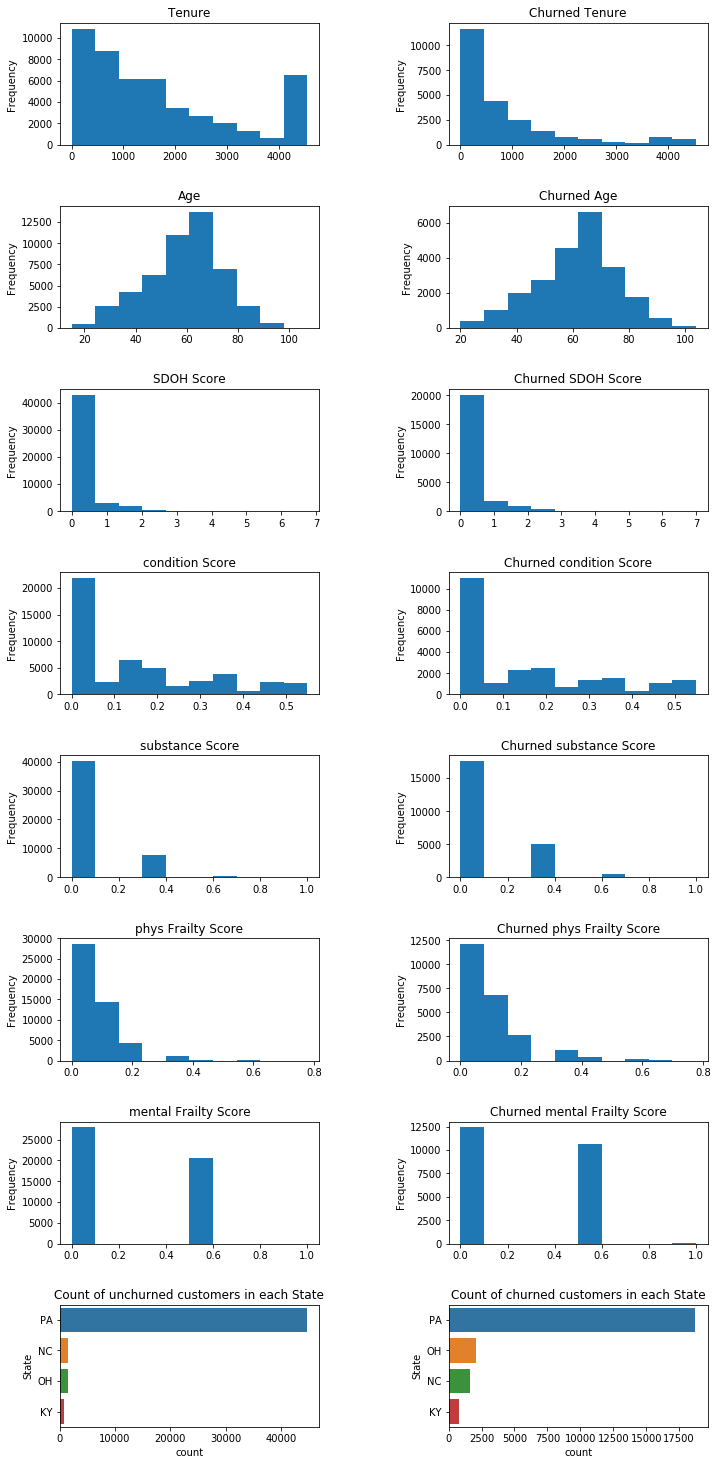

In [32]:
## Histgram plots to assess the distribution pattern and compare if there is any difference between churned and unchurned data.
## This is a critical step to derive insights into feature engineering.

churned=trimmeddf[trimmeddf.churned==1]  ## only churned data
unchurned=trimmeddf[trimmeddf.churned==0] ## only unchurned data
f, axs = plt.subplots(8,2,figsize=(15,10))
plt.subplot(8, 2, 1)
unchurned['Tenure'].plot(kind='hist', title='Tenure')
plt.subplot(8, 2, 2)
churned['Tenure'].plot(kind='hist', title='Churned Tenure')

plt.subplot(8, 2, 3)
unchurned['Age'].plot(kind='hist', title='Age')
plt.subplot(8, 2, 4)
churned['Age'].plot(kind='hist', title='Churned Age')

plt.subplot(8, 2, 5)
unchurned['SDOHScore'].plot(kind='hist', title='SDOH Score')
plt.subplot(8, 2, 6)
churned['SDOHScore'].plot(kind='hist', title='Churned SDOH Score')

plt.subplot(8, 2, 7)
unchurned['conditionScore'].plot(kind='hist', title='condition Score')
plt.subplot(8, 2, 8)
churned['conditionScore'].plot(kind='hist', title='Churned condition Score')

plt.subplot(8, 2, 9)
unchurned['substanceScore'].plot(kind='hist', title='substance Score')
plt.subplot(8, 2, 10)
churned['substanceScore'].plot(kind='hist', title='Churned substance Score')

plt.subplot(8, 2, 11)
unchurned['physFrailtyScore'].plot(kind='hist', title='phys Frailty Score')
plt.subplot(8, 2, 12)
churned['physFrailtyScore'].plot(kind='hist', title='Churned phys Frailty Score')

plt.subplot(8, 2, 13)
unchurned['mentalFrailtyScore'].plot(kind='hist', title='mental Frailty Score')
plt.subplot(8, 2, 14)
churned['mentalFrailtyScore'].plot(kind='hist', title='Churned mental Frailty Score')

plt.subplot(8, 2, 15)
sns.countplot(y="State",data=unchurned)
plt.title('Count of unchurned customers in each State')
plt.subplot(8, 2, 16)
sns.countplot(y="State",data=churned)
plt.title('Count of churned customers in each State')

plt.subplots_adjust(left=0.4, bottom=0.05, right=1, top=2, wspace=0.5, hspace=0.5)
plt.show()

Based on the above plots, there is no apparent difference in the data distribution between churned and unchurned customers, except for tenure.

<a id='2.6'></a>
### 2.6 Colinearity within the features

In [33]:
trimmeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71687 entries, 0 to 76994
Data columns (total 11 columns):
LOB                   71687 non-null object
churned               71687 non-null int64
Tenure                71687 non-null int64
hadGap.               71687 non-null int64
Age                   71687 non-null int64
SDOHScore             71687 non-null float64
conditionScore        71687 non-null float64
substanceScore        71687 non-null float64
physFrailtyScore      71687 non-null float64
mentalFrailtyScore    71687 non-null float64
State                 71687 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 6.6+ MB


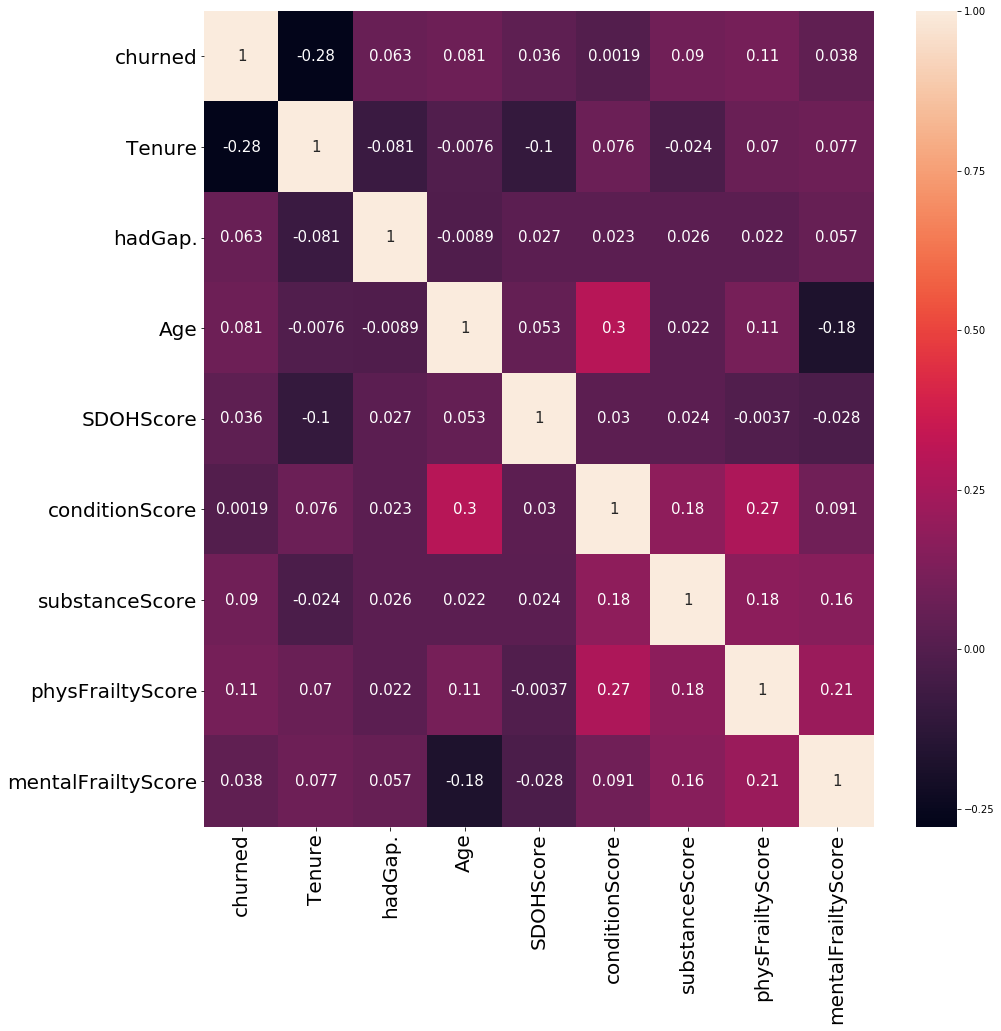

In [34]:
coef = trimmeddf.corr()
sns.heatmap(coef, xticklabels=coef.columns.values, yticklabels=coef.columns.values, annot = True, annot_kws={'size':15})
heat_map=plt.gcf()
heat_map.set_size_inches(15,15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

There are several week colinearities among the features: condition score vs age, consition score vs phys frailty score. However, these colinearities are week, therefore, no feature will be removed at this point.

<a id='3.0'></a>
## 3.0 Machine Learning.

In [35]:
x = pd.get_dummies(trimmeddf, drop_first=True) #Drop first dummy column, since it is correlated to the others
x=x.drop(['churned'], axis=1)
y = trimmeddf['churned'].values

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=10, stratify=y)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)
score_func = make_scorer(roc_auc_score, greater_is_better=True)

<a id='3.1'></a>
### 3.1 Random Forest

In [35]:
#Setup the RF object
rf = RandomForestClassifier(criterion='gini', class_weight='balanced', n_jobs=-1)

#Hyperparameter grid
param_grid = {'n_estimators' : [100, 150, 200], 'min_samples_split' : [2, 3, 4,5], 
              'max_depth' : [10,15,20,25]}

#Setup the Gridsearch
rf_cv = GridSearchCV(rf, param_grid, cv=cv, scoring=score_func, verbose=1)

#Fit the data
rf_cv.fit(x_train, y_train)

#Print out the best model
print('Best RF Params: {}'.format(rf_cv.best_params_))
print('Best RF Score : %f' % rf_cv.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  8.9min finished


Best RF Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best RF Score : 0.717592


In [36]:
rf_best = RandomForestClassifier(criterion='gini', class_weight='balanced', 
                                 n_estimators=rf_cv.best_params_['n_estimators'],
                                 min_samples_split=rf_cv.best_params_['min_samples_split'], 
                                 max_depth=rf_cv.best_params_['max_depth'], random_state=12)

rf_best.fit(x_train, y_train)

#Print the score/metric for the input model which must be fit
def get_scores(model, name='unk', score=roc_auc_score):
    
    #Make prediction for the model
    pred = model.predict(x_test)
    pred_prob = model.predict_proba(x_test)[:,1]
    

    #Calculate the score on the entire test set
    auc = score(y_test, pred_prob)
    
    #Calculate the score on CV test set
    cv_scores = cross_val_score(model, x_test, y_test, cv=cv, scoring=score_func)
    mean_cv = cv_scores.mean()
    std_cv = cv_scores.std()
    
    #Save to dataframe to be used for printing only
    model_score = pd.DataFrame(columns=['Model', 'Test score', 'CV score'])
    model_score.loc[0] = [name, auc, mean_cv]
    model_score.set_index('Model', inplace=True)
    print(model_score)

In [37]:
get_scores(rf_best, 'RF')

       Test score  CV score
Model                      
RF       0.812374  0.688776


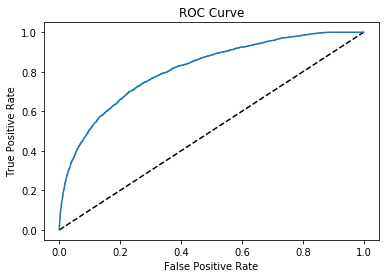

The ROC score for the randomforest model is 0.8124  


In [60]:
# Generate ROC curve values: fpr, tpr, thresholds
y_pred = rf_best.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print( 'The ROC score for the randomforest model is {0:.4f}  '.format(roc_auc_score(y_test, y_pred)))

In [39]:
def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
   
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances by RandomForest Classifier')
    plt.show()
    
    return df

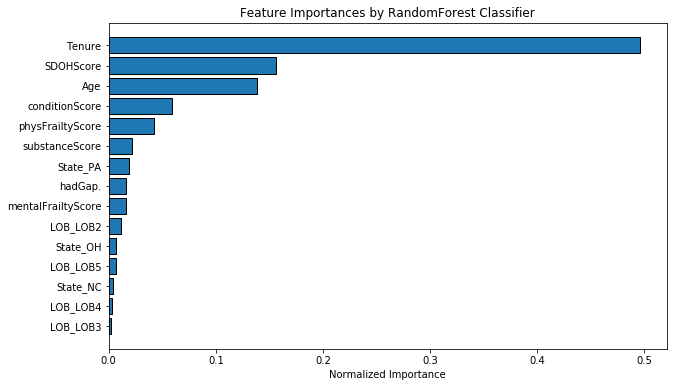

In [40]:
importance = rf_best.feature_importances_
feature = x.columns
fi = pd.DataFrame()
fi['importance'] = importance
fi['feature'] = feature
fi_sorted = plot_feature_importances(fi)

Confusion matrix, without normalization
[[8297 1405]
 [1921 2715]]
The confusion matrix for the randomforest model is listed below:


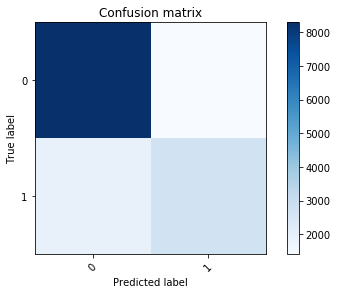

In [64]:
def plot_confusion_matrix(cm, title='Confusion matrix',classes, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['0','1'], rotation=45)
    plt.yticks(tick_marks,  ['0','1'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
y_pred = rf_best.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
print('The confusion matrix for the randomforest model is listed below:')

TN=8297, FP= 1921, FN= 1405, TP=2715 <br>
precision = 60%
recall= 66%

<a id='3.2'></a>
### 3.2 Gradient Boosting

Gradient boosting does not have the built-in class weight parameter. Since the two classes are imbalanced, we will first balance the data using SMOTE (Synthetic Minority Over-sampling Technique) to resample the data, before feeding them to the model.

In [37]:
## Resampling: oversampling using SMOTE

kind = 'regular'
sm = SMOTE(kind='regular')
x_res, y_res = sm.fit_sample(x, y)

print("esampled Dataset has shape: ", x_res.shape)
print("Number of Fraud Cases (Real && Synthetic): ", np.sum(y_res))

x_train_res, x_test_res, y_train_res, y_test_res= train_test_split(x_res, y_res)

esampled Dataset has shape:  (97012, 18)
Number of Fraud Cases (Real && Synthetic):  48506


In [63]:
#Setup the GD object
GDboost = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=1,
                              random_state=14) ## verbose is used to express the anticipated run time

GDboost.fit(x_train_res, y_train_res)

cv_scores = cross_val_score(GDboost, x_train_res, y_train_res, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score of gradient boosting model is: ","{0:.3f}".format(np.mean(cv_scores)))


[0.96 0.96 0.95 0.95 0.96]
Average 5-Fold CV Score of gradient boosting model is:  0.955


In [64]:
get_scores(GDboost, 'Gradeint Boost')

                Test score  CV score
Model                               
Gradeint Boost    0.977613  0.897571


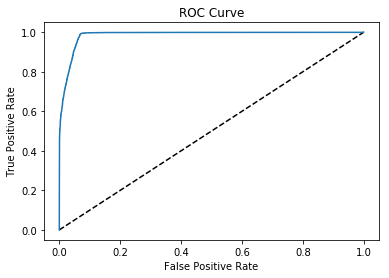

The ROC score for the Gradient Boosting model is 0.9852  


In [65]:
# Generate ROC curve values: fpr, tpr, thresholds
y_pred_GD = GDboost.predict_proba(x_test_res)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_res,y_pred_GD)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print( 'The ROC score for the Gradient Boosting model is {0:.4f}  '.format(roc_auc_score(y_test_res,y_pred_GD)))

Confusion matrix, without normalization
[[11195   810]
 [  176 12072]]


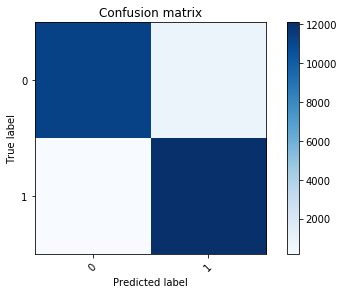

In [46]:
y_pred_GD = GDboost.predict(x_test_res)
cm = confusion_matrix(y_test_res, y_pred_GD)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

TN=11195, FP= 810, FN= 176, TP=12072 <br>
precision = 94%
recall= 98%

<a id='3.3'></a>
### 3.3 Create churn risk labels for existing customers

In [47]:
unchurned=trimmeddf[trimmeddf.churned==0]
unchurnedx=unchurned.drop('churned', axis=1)
unchurnedx=pd.get_dummies(unchurnedx,drop_first=True)

In [48]:
probs= GDboost.predict_proba(unchurnedx)[:,1] ## extract the churn probability for existing customers.

The default threshold in predicting the class is 0.5. Any prediction with churn probability less than 0.5 is categorized as 
unchurned (existing customers). However, there is still possibility that these existing customers may disenroll in the future.
We will use the probability values calcuted from the model to assess the risk of churn for exisiting customers.

In [53]:
score=[]
for prob in probs:
    x=0
    if prob>0 and prob<0.1:
        x=1
    elif prob>=0.1 and prob<0.2:
        x=2
    elif prob>=0.2 and prob<0.3:
        x=3
    elif prob>=0.3 and prob<0.4:
        x=4
    elif prob>=0.4:
        x=5
    score.append(x)

In [54]:
final_unchurned=unchurned.assign(Churn_risk_score=score)

In [55]:
final_unchurned.head()

,LOB,churned,Tenure,hadGap.,Age,SDOHScore,conditionScore,substanceScore,physFrailtyScore,mentalFrailtyScore,State,Churn_risk_score
0,LOB2,0,49,0,59,0.018738,0.0,0.0,0.0,0.0,PA,1
1,LOB1,0,49,0,80,0.012270,0.0,0.0,0.0,0.0,PA,1
2,LOB1,0,49,0,45,0.000435,0.0,0.0,0.0,0.0,PA,1
3,LOB4,0,49,0,25,0.033174,0.0,0.0,0.0,0.0,NC,1
4,LOB5,0,49,0,66,0.405166,0.0,0.0,0.0,0.0,OH,1


The existing customers are divided into 5 groups, each with a different risk score: <br>
1 corresponds to minimal risk of disenrollment, <br>
2 corresponds to low risk of disenrollment, <br>
3 corresponds to low to medium risk of disenrollment, <br>
4  corresponds to medium risk of disenrollment, and <br>
5 corresponds to high risk of disenrollment in the future.<br>

Using this index, the insurance company can make different startegies that focus on different risk groups: for example: sending out surveys to high risk group to understand customer behavior and opitions about the insurance in order to improve their experience and retention rate. Other strategies can include lower the insurance premium, co-pay, deductible, investing in marketing for mid age to senior group (age of 40 to 80) that have a higher retention rate.

<a id='4.0'></a>
## 4.0 Further discussion

There are several in-depth analysis we could do to potentially improve the model performance:

<br>
1) Instead of removing the four variables: EDCost,EDCount,IPCost,IPCount, we could impute the missing data using mean, most frequent or median values from each variables for machine learning.

2) Instead of using State and LOB groups as independent variables, one can do individual prediction under each category. For example, separate customers from PA and do an individual prediction.

3) Instead of removing the four variables: EDCost,EDCount,IPCost,IPCount, we could remove the rows with missing values in these four columns. Although losing data, the added four columns could be important features for churn prediction.

4) Evaluate other ML algorithms such as SVM (long run time) or KNN and compare the performances.

5) Feature engineering, which needs domain knowledge: creating new feature(s) using a combination of existing features.

6) Remove colinear features: such as condition score or phys frailty score as suggested in section 2.6.

7) Tune hyper parameters on Gradient boosting and try Adaboosting and XGboosting

8) False postive vs false negative: in this case, we want our model to be conservative on predicting churn, in other words, false postive is better than false negative (failing to identity customer with high tendency to disenroll). In that sense, false positive is preferred over false negative.